<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### problem statement
- Identify whether a liability customer will purchase a loan or not
- What variables are significant in determining loan acceptance
- What segment of customers should be targeted more to increase loan clientele at the bank



### Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Load libraries and different functions required for model

- Import packages such as numpy , pandas 
-Import sklearn packages 
    - metrics 
    - models
-Import seaborn for data vis

In [ ]:


# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

### load the dataset 

In [ ]:
df = pd.read_csv("Loan_Modelling.csv")

### look at a sample of the dataframe by using head method 

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# check to see what type the variables are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()
# get descriptive stats on dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df["Securities_Account"].unique().sum()

1

In [ ]:
# check shape of the data 
df.shape

(5000, 14)

In [ ]:
# these all int and one float so no need to convert to category

### Data preprocessing
- Check for null values
- fill in null values if they are missing
- process the zipcode


In [ ]:
# check for null values

df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# there are zero missing values present

### EDA
- Univariate Analysis
- Bivariate Analysis 

#### Univariate Analysis

In [ ]:
### Univariate Data Analysis

def univ_analysis(df):
    
    for rows, cols in df.items():
        if pd.api.types.is_numeric_dtype(cols):
            
            sns.set()
           
            fig, ax = plt.subplots()
            
            
            fig.set_size_inches(10,10)
            
            sns.histplot(x=cols, data= df, kde = True)
            #plt.title(cols)
            #plt.xlabel("columns)
            #plt.ylabel(rows")
            #print("This graph is the variable", df.columns(columns))
            plt.show()
            sns.boxplot(x=cols, data= df)
            plt.show()
             
        
        elif pd.api.types.is_string_dtype(attributes):
            sns.set()
           
            fig, ax = plt.subplots()
                        
            fig.set_size_inches(10,10)
            
            
           
            sns.countplot(x=cols, data= df);       
            plt.show()   
       

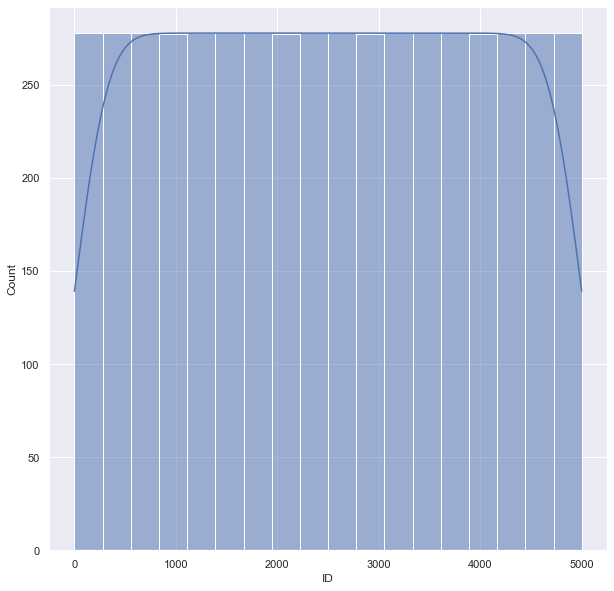

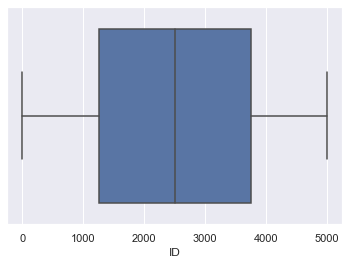

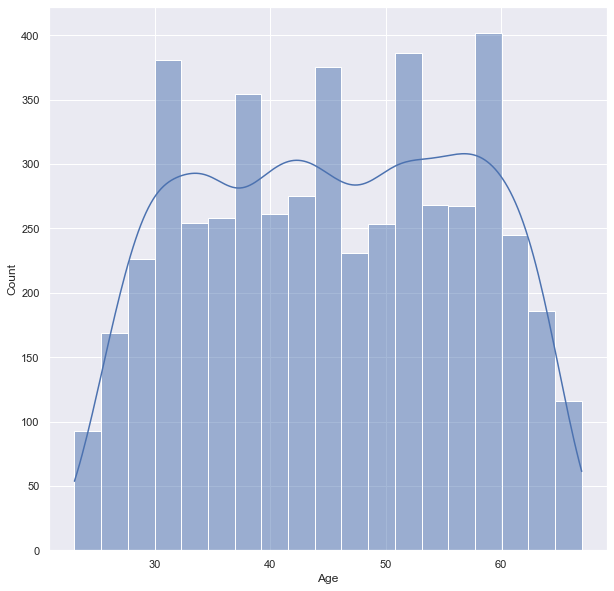

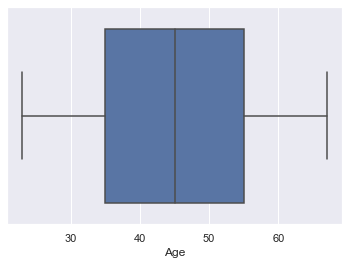

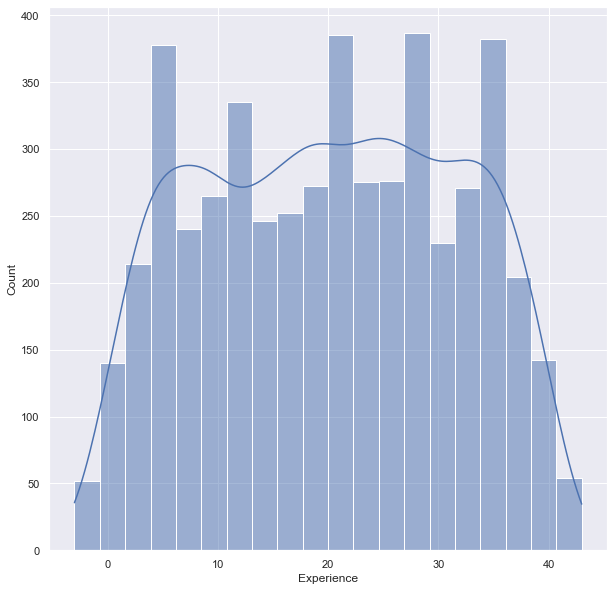

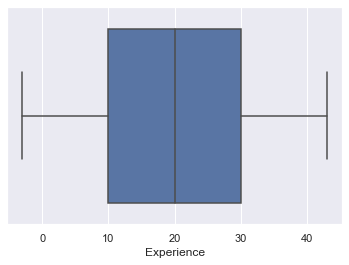

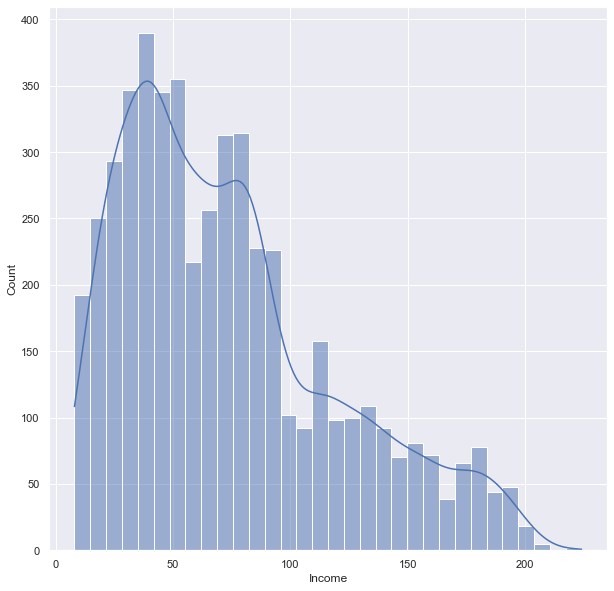

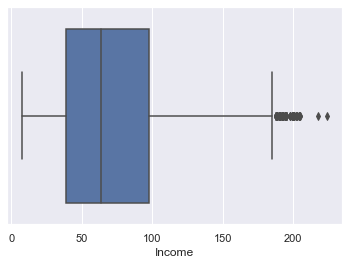

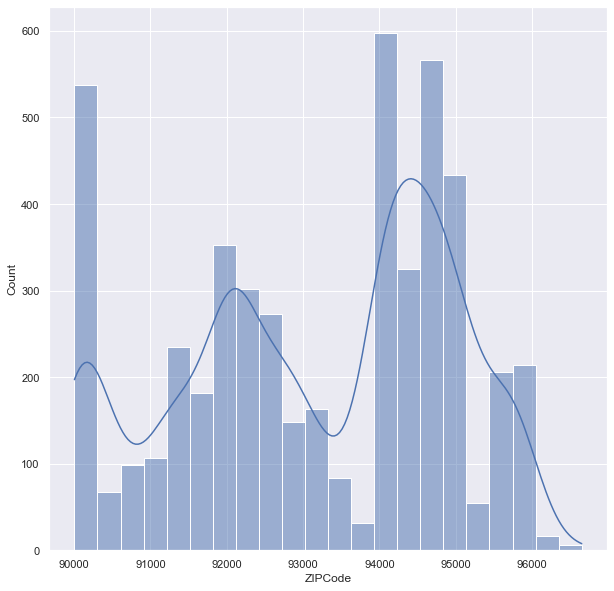

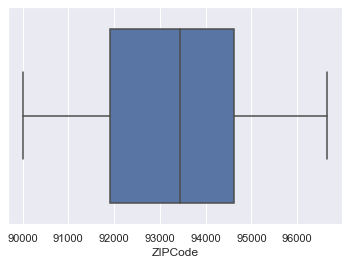

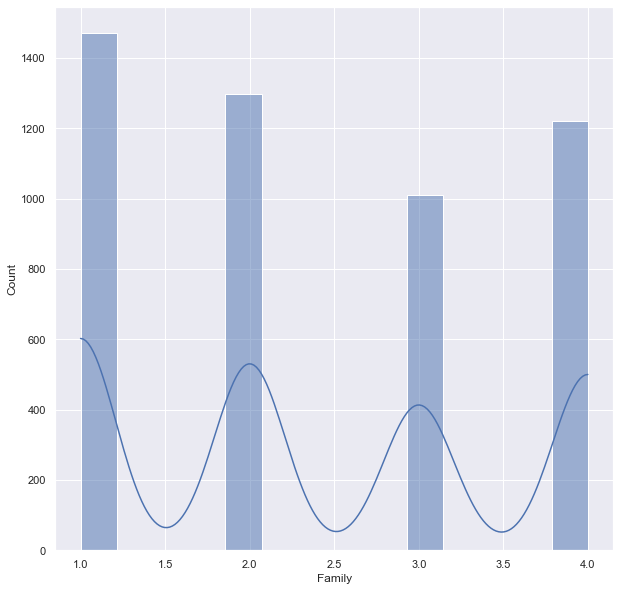

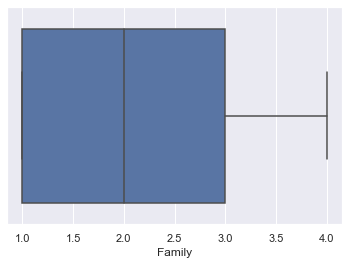

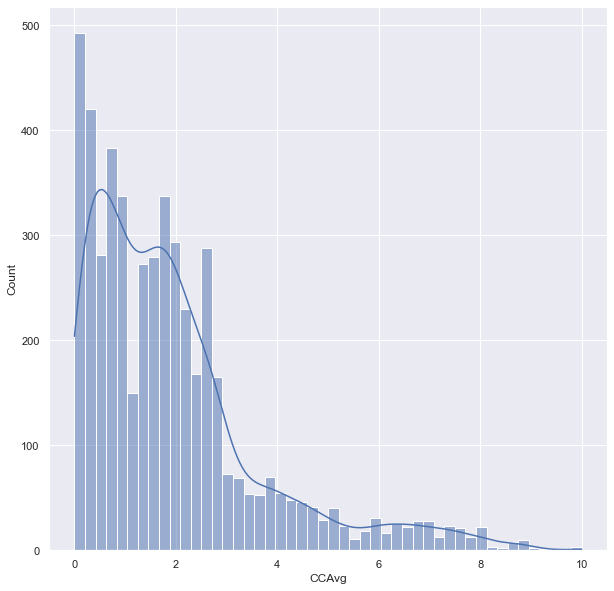

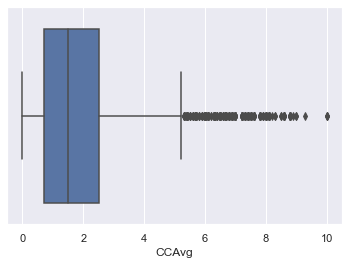

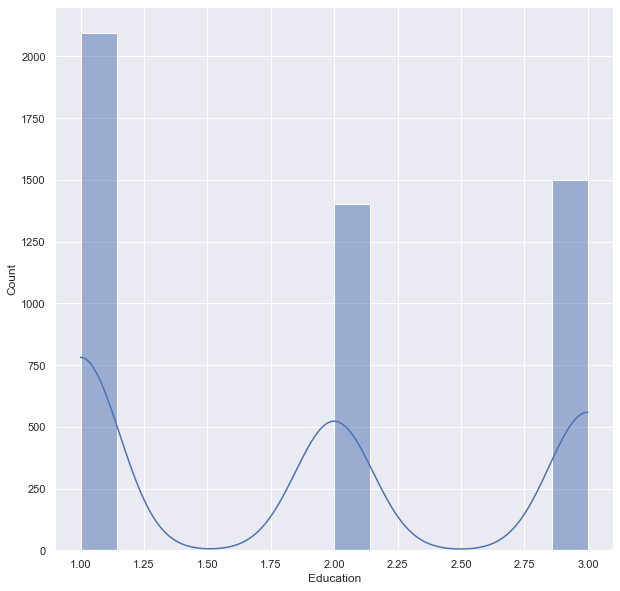

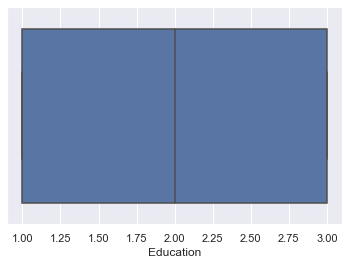

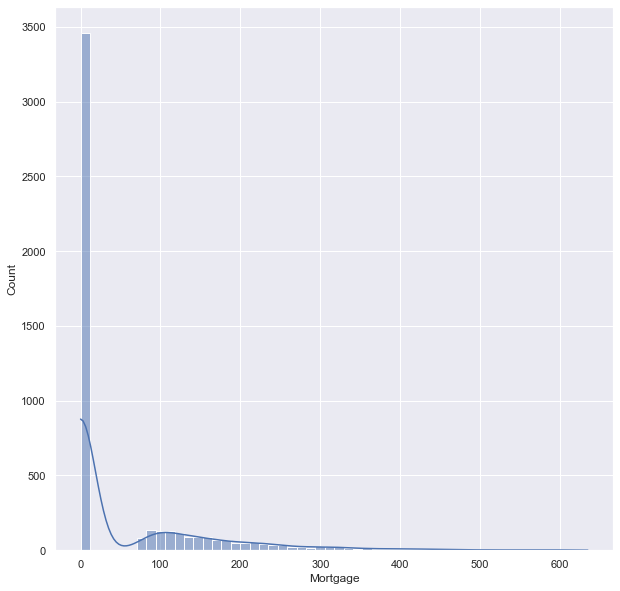

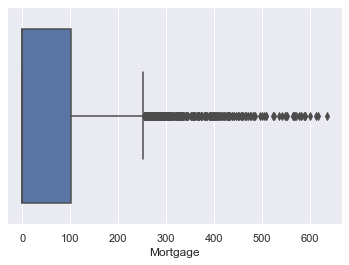

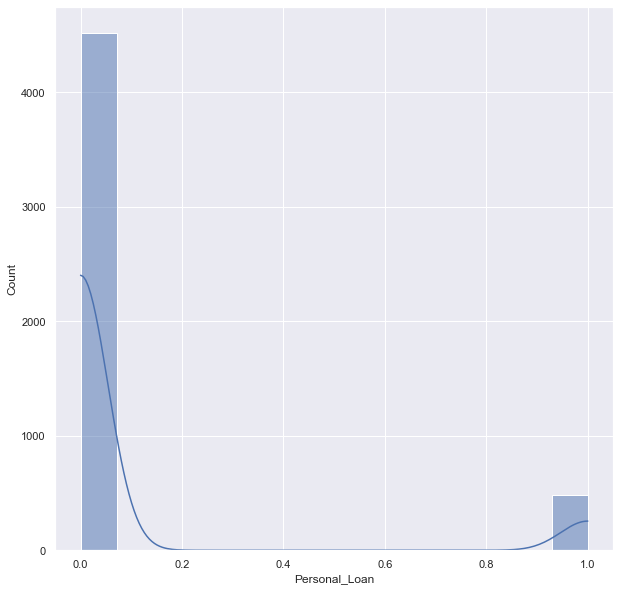

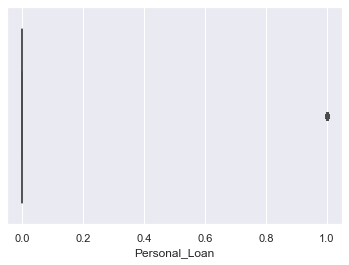

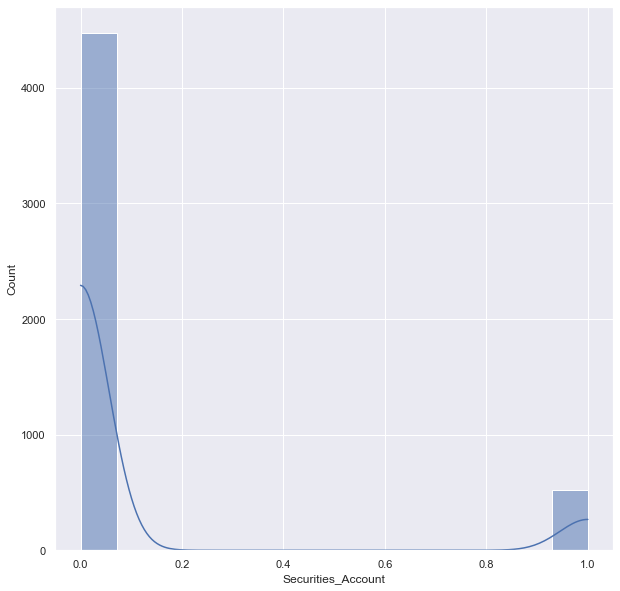

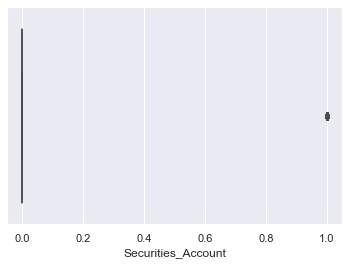

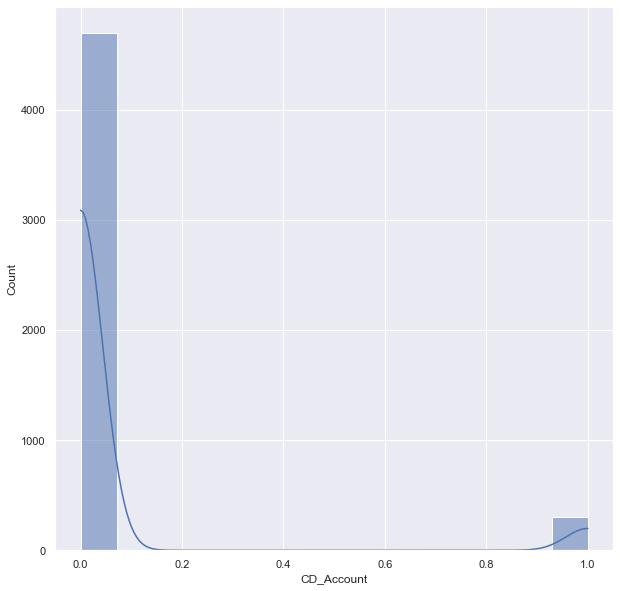

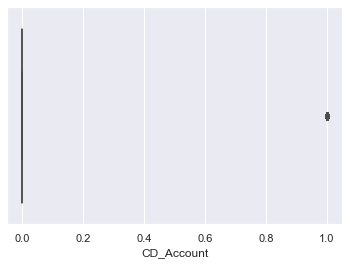

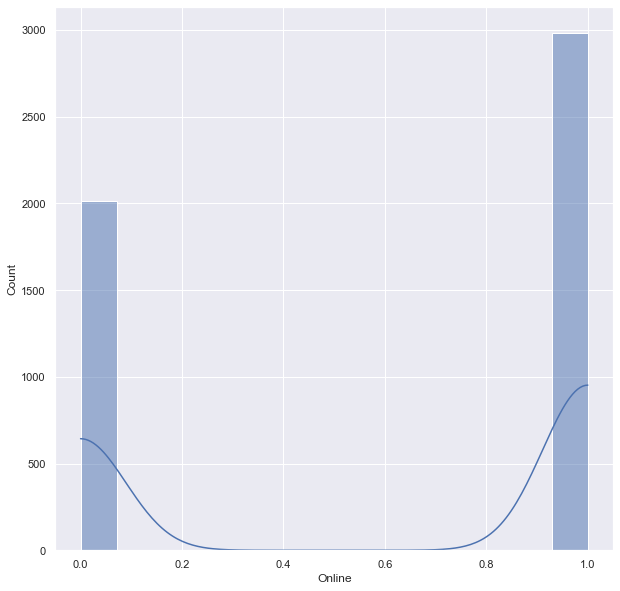

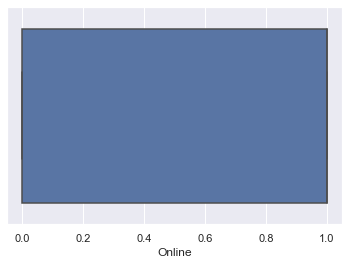

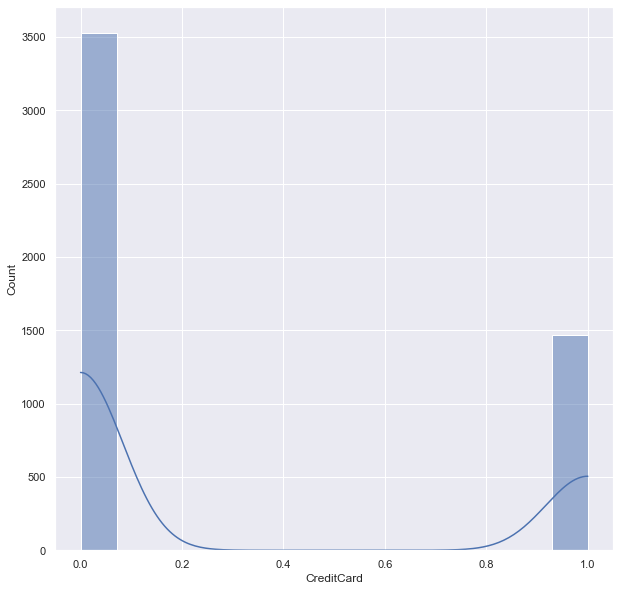

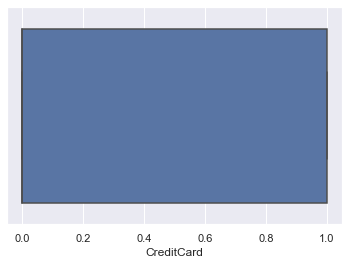

In [ ]:
univ_analysis(df)

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (with flier removed) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",
    )

    plt.tight_layout()
    plt.show()


In [ ]:
### Bi variate Analysis

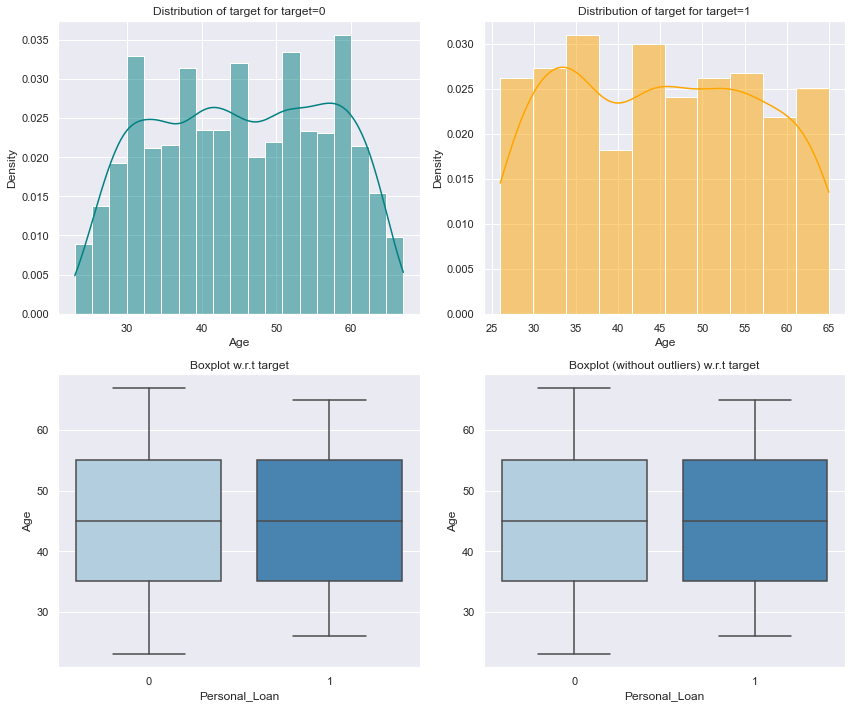

In [ ]:
distribution_plot_wrt_target(df,"Age", "Personal_Loan")

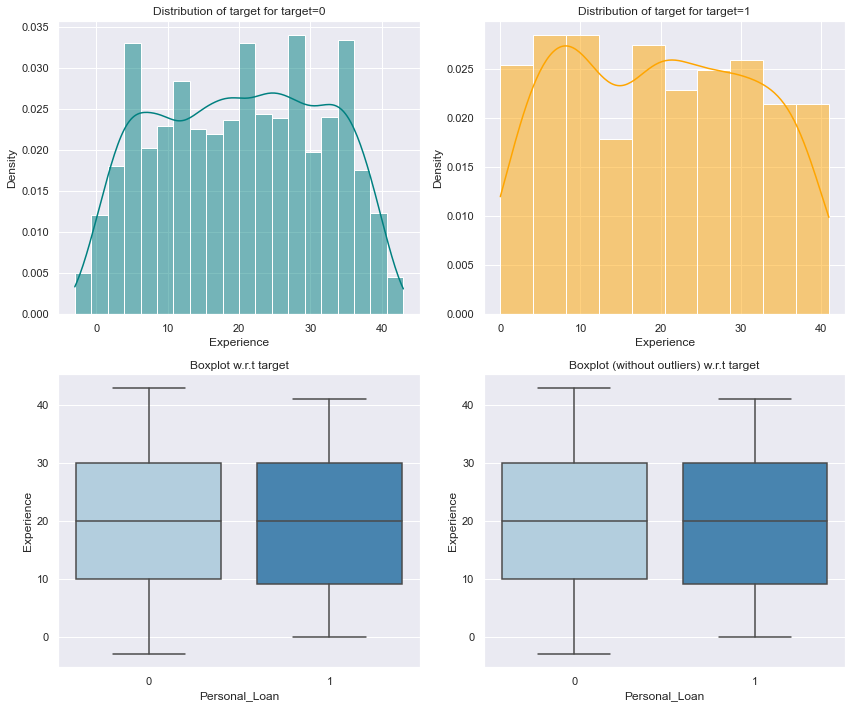

In [ ]:
distribution_plot_wrt_target(df,"Experience", "Personal_Loan")

### insights 

- Both age and experience don't have Presence of outliers so this data can be ran through
the machine learning model 

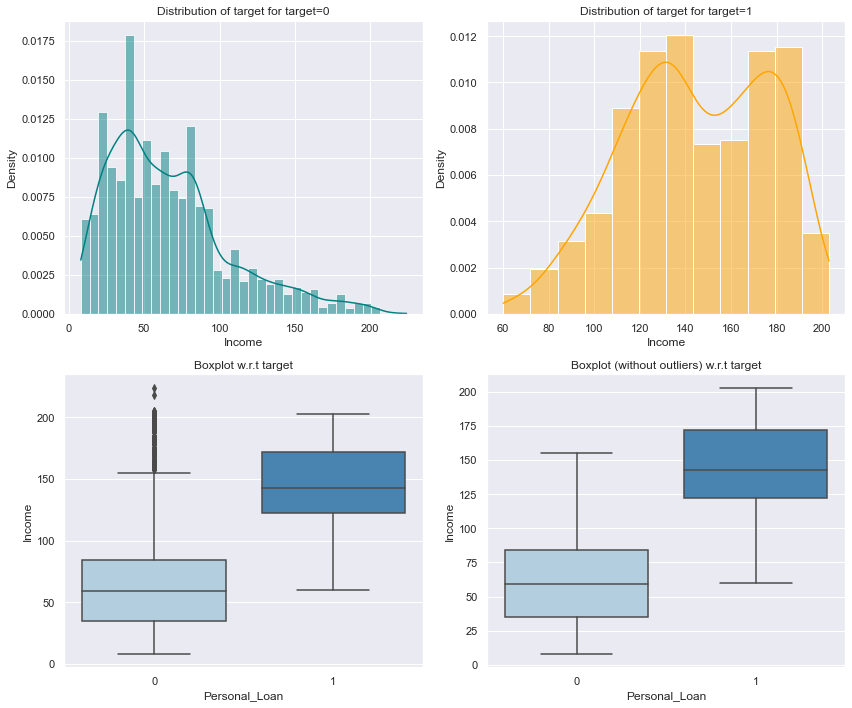

In [ ]:
distribution_plot_wrt_target(df,"Income", "Personal_Loan")

### the income is right skewed for people who have not been granted a loan.
We will need to transform this data prior to running it through the model.
    - THe data is bimodal as well, so two distributions fit this data for 
    modeling the best.
    

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

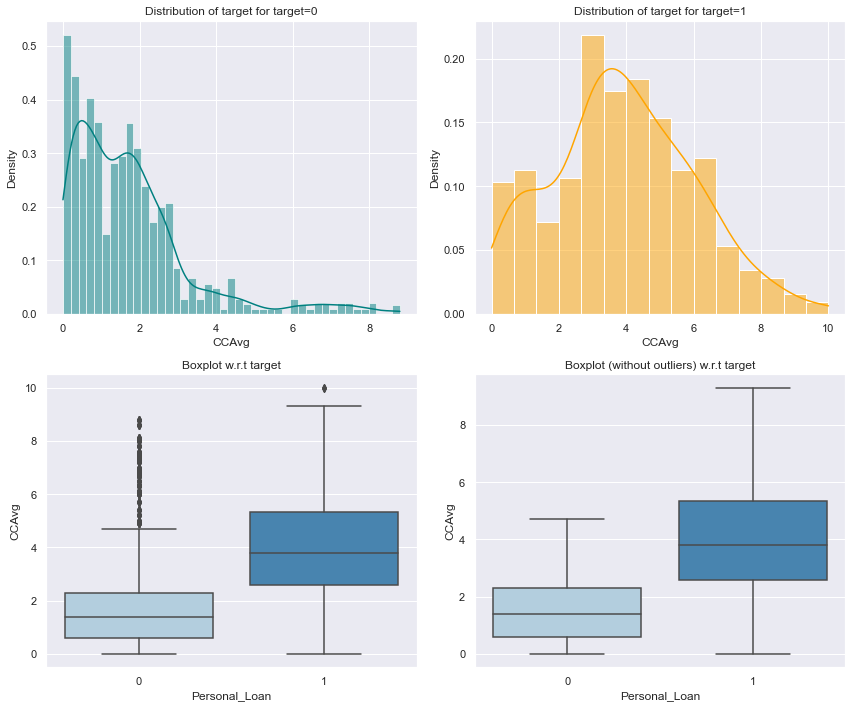

In [ ]:
distribution_plot_wrt_target(df,"CCAvg", "Personal_Loan")

#### Insights 
- The data is right skewed, so we will do a log transform on the data to 
normalize the data
- 

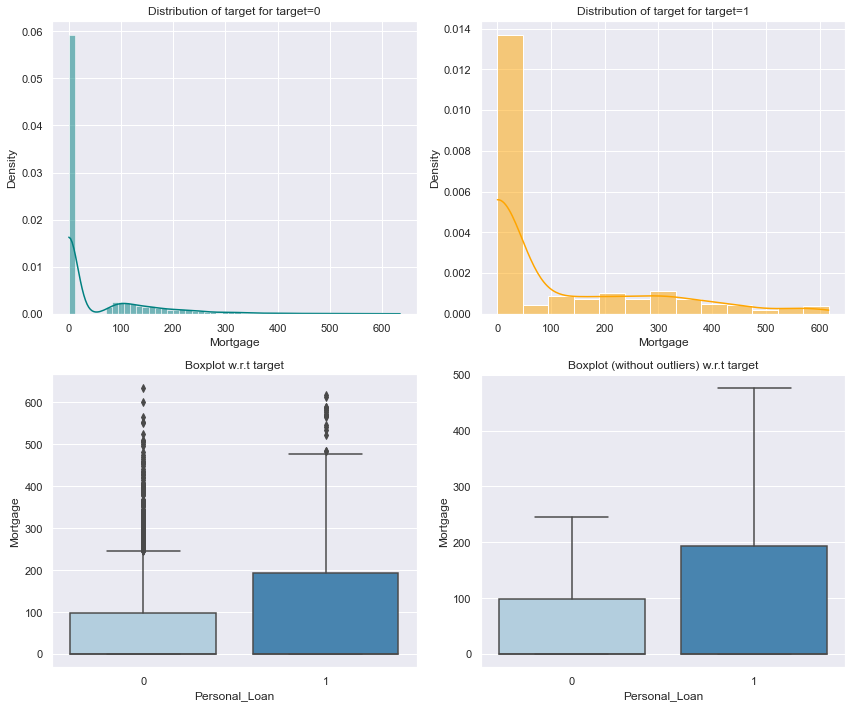

In [ ]:
distribution_plot_wrt_target(df,"Mortgage", "Personal_Loan")

In [ ]:
# we will run a model with and with out outliers processed for Mortgage
# value

### use count plots for categorical or discrete variables
- Discrete var list: ZipCode, Education, Securities Account, CD_Account
    - CD_Account, Online, Credit_Card

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = 'Personal_Loan'
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

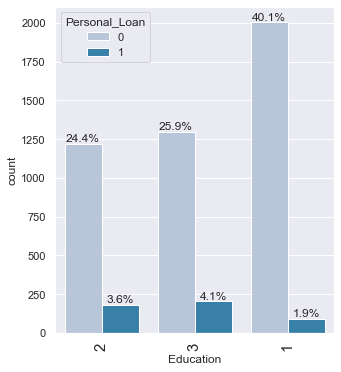

In [ ]:
labeled_barplot(df, "Education", perc = True, n= None)

### Insights 
- 40% of the data that don't get approved for loans are clients that have 
Undergraduate degrees

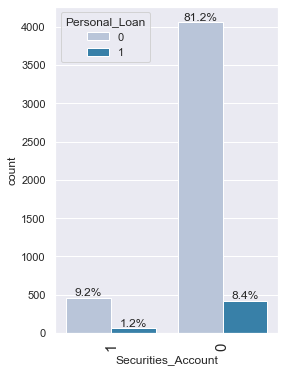

In [ ]:
labeled_barplot(df, "Securities_Account", perc = True, n =None)

### Insights 
- 81.2 % of the clients that don't get approved of the loan don not have a 
 security account with the bank

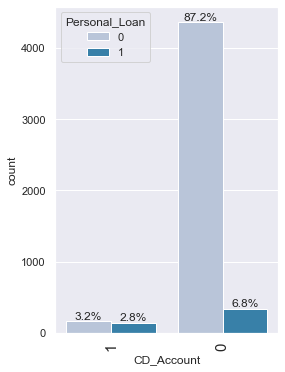

In [ ]:
labeled_barplot(df, "CD_Account", perc = True, n =None)

### insights
- 87.2% of the client base that dont't have a CD account, don't get approved
for a personal loan with the bank


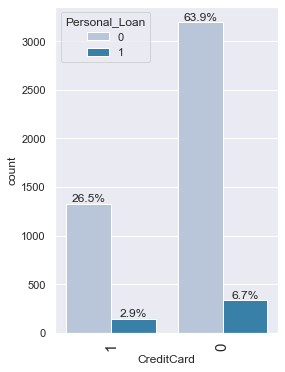

In [ ]:
labeled_barplot(df, "CreditCard", perc = True, n =None)

### Insights 

- 64% of the clients that don't get approved for a personal loan , don't 
have a credit card with the bank

In [ ]:
### process zipcode

In [ ]:
tmp_df= df.copy()

In [ ]:
tmp_df["ZIPCode"] = tmp_df["ZIPCode"].astype(str)

## calculate number of unique values if take first 3 numbers of zipcode
# use list slicing to use first 2 digits of the 
num_list =[2,3,4,5]

for i in num_list:
    

    print(
        "number of unique zipcode values with", i,  "digits are", 
        tmp_df["ZIPCode"].str[0:i].nunique()


)

number of unique zipcode values with 2 digits are 7
number of unique zipcode values with 3 digits are 57
number of unique zipcode values with 4 digits are 221
number of unique zipcode values with 5 digits are 467


In [ ]:
# transform column to 7 values

tmp_df["ZIPCode"] = tmp_df["ZIPCode"].str[0:2]

- we will use the configuration for 2 digits and plot those in the below 
barplot

In [ ]:
# check and see if the data transformed
tmp_df["ZIPCode"].head(10)

0    91
1    90
2    94
3    94
4    91
5    92
6    91
7    93
8    90
9    93
Name: ZIPCode, dtype: object

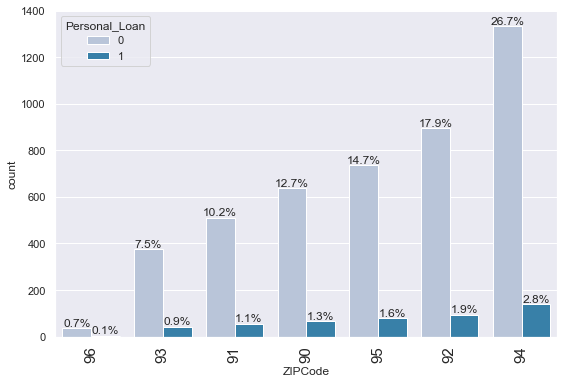

In [ ]:
labeled_barplot(tmp_df, "ZIPCode", perc = True, n =None)

### Insights the majority of the customers live in zipcode 94 bin
- meaning the first two digits of there zipcode start with 94

### need to make transformations to eliminate skewness of certain data

- Income(thousands of dollars) and CCAVG(in thousands of dollars) 
    -Look at income and CCAvg before log transformation and plot a histogram
    


In [ ]:
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

In [ ]:
# check data after lof transformation

df.head(5)

,ID,Age,Experience,ZIPCode,Family,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log
0,1,25,1,91107,4,1,0,0,1,0,0,0,3.912023,0.955511
1,2,45,19,90089,3,1,0,0,1,0,0,0,3.555348,0.916291
2,3,39,15,94720,1,1,0,0,0,0,0,0,2.484907,0.693147
3,4,35,9,94112,1,2,0,0,0,0,0,0,4.615121,1.308333
4,5,35,8,91330,4,2,0,0,0,0,0,1,3.828641,0.693147


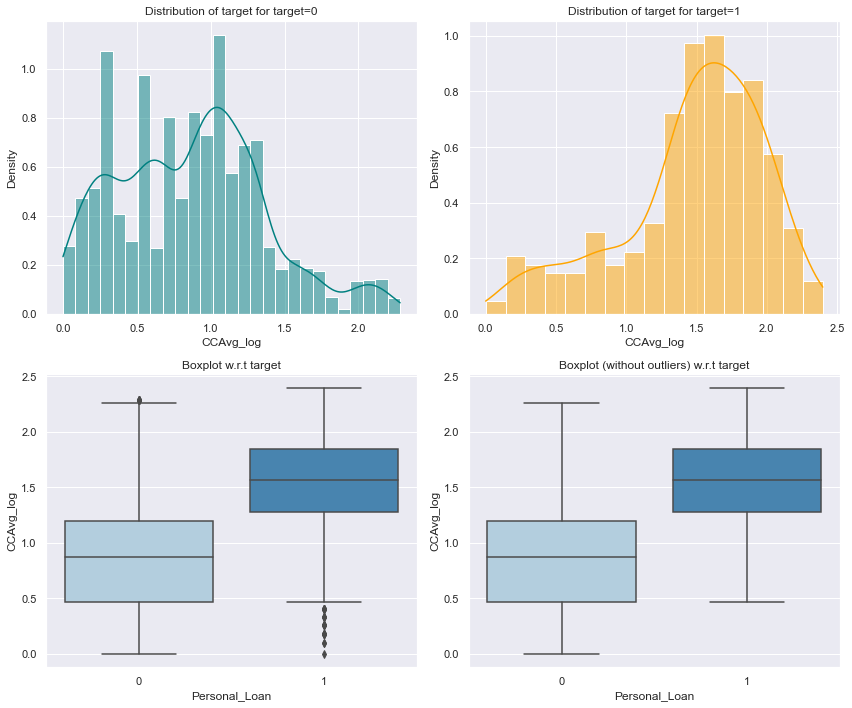

In [ ]:
distribution_plot_wrt_target(df,"CCAvg_log", "Personal_Loan")

distribution_plot_wrt_target(df,"Income_log", "Personal_Loan")

### Process outliers in mortgage data 

In [ ]:
    
mortgage_quartiles =np.quantile(tmp_df['Mortgage'][tmp_df['Mortgage'].notnull()], [.25, .75])
mortgage_quartiles_iqr = 4 * (mortgage_quartiles[1] - mortgage_quartiles[0])


In [ ]:
mortgage_quartiles
print()

array([  0., 101.])

In [ ]:
mortgage_quartiles_iqr

404.0

In [ ]:
print("the range is from", 4*mortgage_quartiles[0],"to", 4*mortgage_quartiles[1])

the range is from 0.0 to 404.0


In [ ]:
#values outside of this range will be dropped 

In [ ]:
# define quartiles for each affected column with outliers

#quartile_list = ["Mortgage"]

    
mortgage_quartiles =np.quantile(tmp_df['Mortgage'][tmp_df['Mortgage'].notnull()], [.25, .75])
mortgage_quartiles_iqr = 4 * (mortgage_quartiles[1] - mortgage_quartiles[0])




In [ ]:
outlier_mortgage =tmp_df.loc[np.abs(tmp_df['Mortgage'] - tmp_df['Mortgage'].median()) > mortgage_quartiles_iqr, 'Mortgage']

In [ ]:
len(outlier_mortgage)

70

In [ ]:
# 70 values are beyond the 404 thousand outlier threshold, so they will be dropped

In [ ]:
tmp_df.drop(outlier_mortgage.index,axis= 0,inplace=True)

In [ ]:
# check for shape of data after outliers have been removed 

tmp_df.shape

(4930, 14)

In [ ]:
# our original dataset was 5000 so 70 values with outlier mortgage values have
#`been sucessfully dropped from the data set

In [ ]:
### EDA after outlier treatment

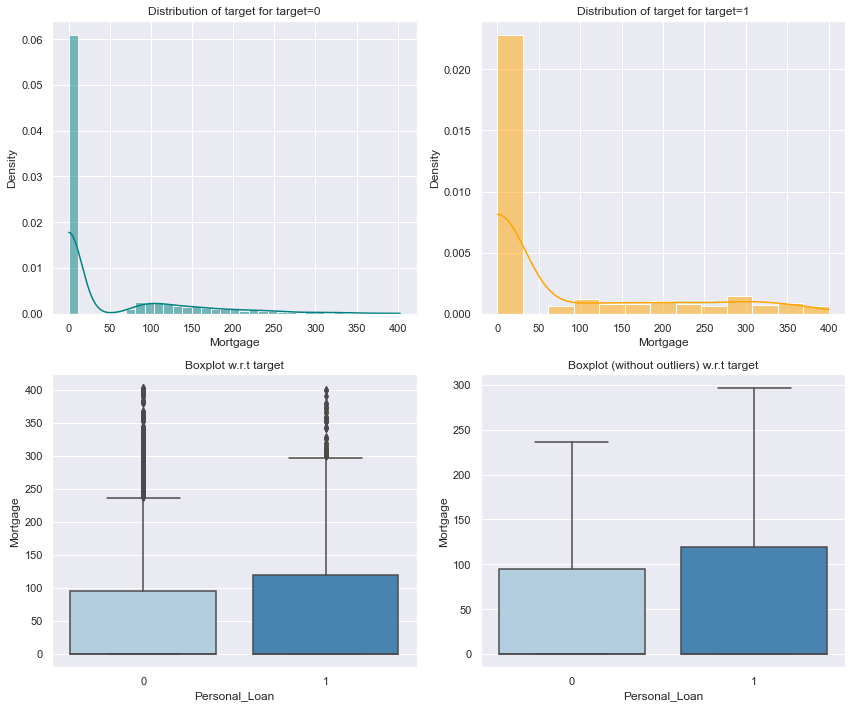

In [ ]:
distribution_plot_wrt_target(tmp_df,"Mortgage", "Personal_Loan")

In [ ]:
### plot correlation matrix 


In [ ]:
## drop columns that don't need to be in for correlation matrix
#corr_matrix = df[["Personal_Loan"],["Income_log"],["CCAvg_log"],["Mortgage"]]

corr_matrix_df = pd.concat([tmp_df['Personal_Loan'], tmp_df['Income_log'],tmp_df['CCAvg_log'], tmp_df['Mortgage'], 
                            tmp_df["Age"], tmp_df['Experience']], axis=1, )

In [ ]:
corr_matrix1 = corr_matrix_df.corr()

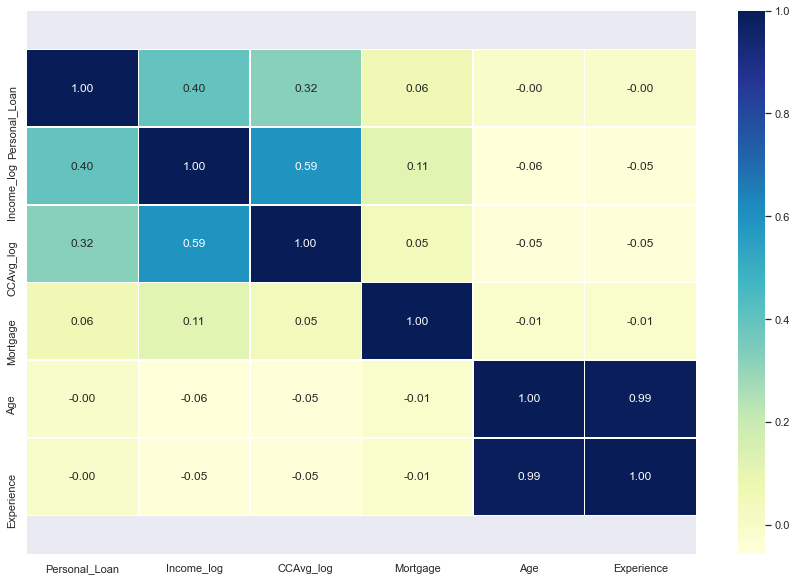

In [ ]:
# let's make our correlation matrix a little prettier

fig, ax = plt.subplots(figsize= (15,10))
ax = sns.heatmap(corr_matrix1, 
                annot = True,
                linewidths=0.5,
                fmt= ".2f",
                cmap= "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - 0.5)
plt.show()

#### only a few numerical features have correlation with the target var 
- Income level (log transformed)
- Credit Card Spending per month(log transformed)


In [ ]:
# make functions to display performance data

def model_perf_classification(model, predictors, target):
    
    # look at precision,recall, accuracy and F1 score
    
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target,pred)
 
# create df perf metrics

    df_metrics = pd.DataFrame({
    "Accuracy": acc, "Recall": recall, "Precision":precision,
        "f1": f1}, index=[0]
    )
    return df_metrics

In [ ]:
def confucious_matrix(model, predictors, target):
    #make confusion matrix 
    """
    to plot the confusion matrix from the pred values with percentages 
    model:classifier
    predictors: independent var
    target: dep var
    
    """
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target,y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
        
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Make feature matrices

In [ ]:
X = tmp_df.drop(["Personal_Loan"], axis= 1)
y= tmp_df["Personal_Loan"]

In [ ]:
# split data into training and test data

In [ ]:
# Make training and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3,
    
    random_state=1)

In [ ]:
# check the shape of the training and test set 

print("The number of rows in the training data =", X_train.shape[0])
print("The number of rows in the test data =", X_test.shape[0])

The number of rows in the training data = 3451
The number of rows in the test data = 1479


In [ ]:
print("percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

percentage of classes in training set:
0    0.907563
1    0.092437
Name: Personal_Loan, dtype: float64
percentage of classes in test set:
0    0.915483
1    0.084517
Name: Personal_Loan, dtype: float64


In [ ]:
### instantiate a decision tree model and check for scores on training data

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=1)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
model_perf_classification(decision_tree_model, X_train, y_train)

,Accuracy,Recall,Precision,f1
0,1.0,1.0,1.0,1.0


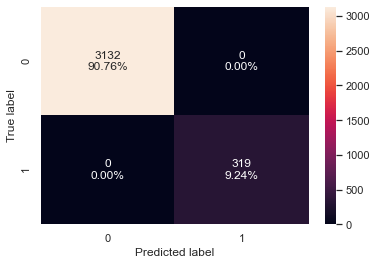

In [ ]:
confucious_matrix(decision_tree_model,X_train,y_train)

In [ ]:
# this confusion matrix indicates that the mode lis overfitting the data

In [ ]:
# these high scores are because the tree doesnt have max depth and it will
# continue the algorithm until complete purity is reached

In [ ]:
stock_dec_tree= model_perf_classification(decision_tree_model,X_test,y_test)

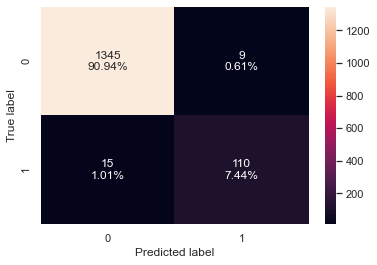

In [ ]:
confucious_matrix(decision_tree_model,X_test,y_test)

In [ ]:
# visualize the tree 

column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'ZIPCode', 'Family', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Income_log', 'CCAvg_log']


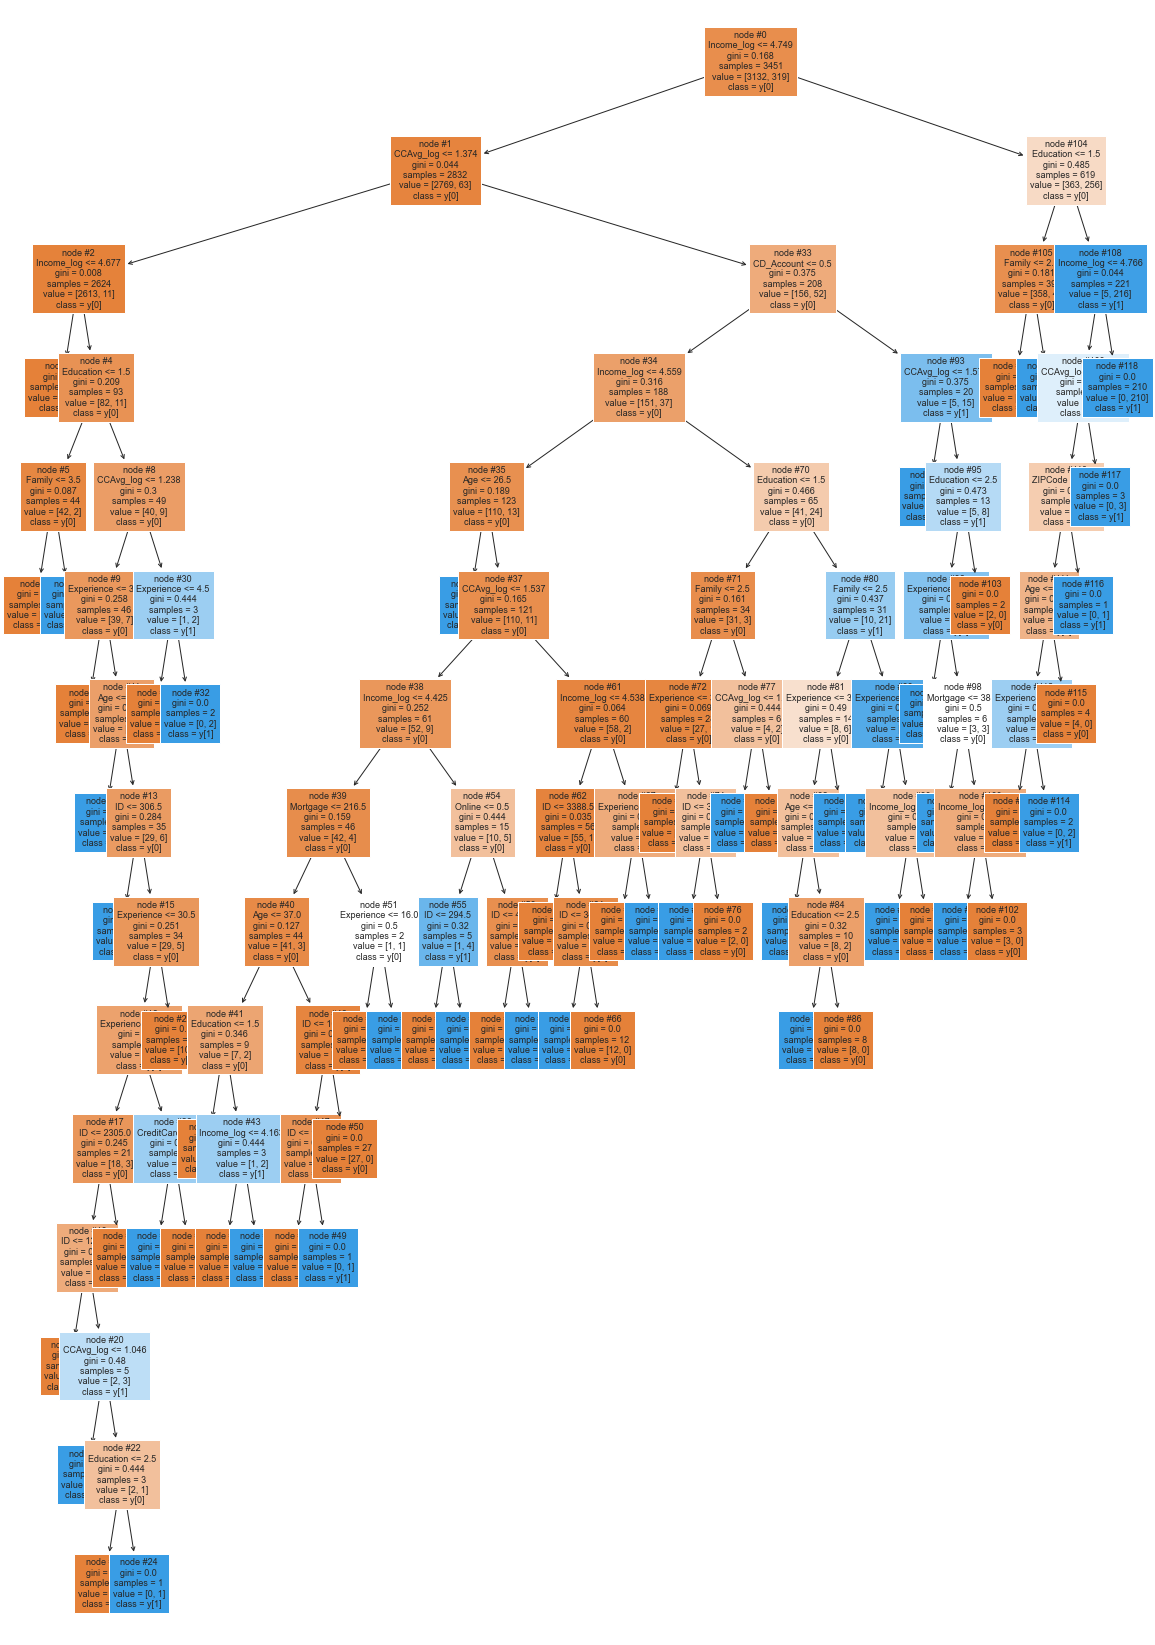

In [ ]:
plt.figure(figsize = (20,30))

out = tree.plot_tree(decision_tree_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True
                                        )
plt.show()


In [ ]:
# the first iteration of the tree is quite messy and very hard to understand
# GridSearcVV will simplify the tree a bit more

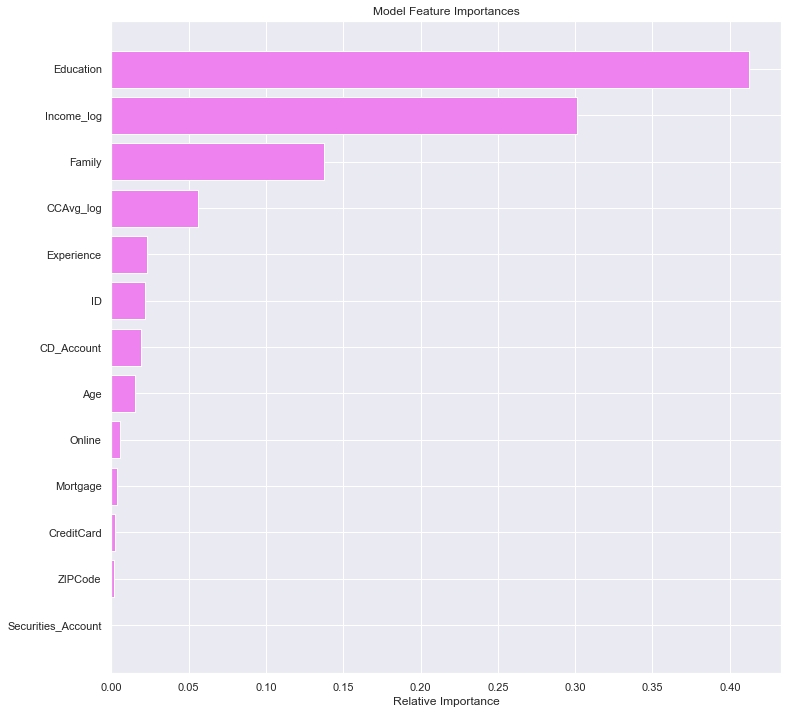

In [ ]:
# look at the feature importances of the stock model
importances = decision_tree_model.feature_importances_
sort_importances = np.argsort(importances)


# plot feature importances

plt.figure(figsize=(12,12))
plt.title("Model Feature Importances")
plt.barh(range(len(sort_importances)), importances[sort_importances],color = "violet")
# use list comprehension
plt.yticks(range(len(sort_importances)),[feature_names[i] for i in sort_importances])
plt.xlabel("Relative Importance")
plt.show()

### insights on feature importance

- The top three features of the data are Education, Incomem and Family 

### Tuning the model
- Pre pruning by using the grid search cv method
- Cost complexity pruning using ccp alpha

In [ ]:
### Hyper parameter tuning

# use grid search cv to preprune tree

# chose the type of classifier

estimator = DecisionTreeClassifier(random_state=1)

# use gridsearch cv 

# make parameter dict

parameters = {
    "max_depth" : [np.arange(2,10,1),None],
    "criterion" : ["gini","entropy"],
    'splitter': ["best", "random"],
    "min_impurity_decrease" : [0.000001, 0.00001, 0.0001, .001],
    "min_samples_split" : [float, 2]
    
    
}

# score the model

acc_scorer = make_scorer(f1_score)

# run the gridsearch 

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the model to the best params 

estimator = grid_obj.best_estimator_

# fit the best model

estimator.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=1)

In [ ]:
print("The best parameters are",estimator)

The best parameters are DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=1)


In [ ]:
# Check the performance of the hypertuned model
model_perf_classification(grid_obj,X_train,y_train)

,Accuracy,Recall,Precision,f1
0,0.986381,0.915361,0.935897,0.925515


In [ ]:
grid_searchcv_mod = model_perf_classification(grid_obj,X_test,y_test)
grid_searchcv_mod

,Accuracy,Recall,Precision,f1
0,0.985801,0.888,0.940678,0.91358


In [ ]:
# make data frame to compare to


model_test_comp_df = pd.concat(
[stock_dec_tree.T, grid_searchcv_mod.T 
    ], axis = 1, 
)


In [ ]:
model_test_comp_df.columns = [
    "Stock_Dec_Tree_Mod",
    "dec tree (pre-pruning)"]

In [ ]:
model_train_comp_df.columns

Index(['Stock_Dec_Tree_Mod', 'dec tree (pre-pruning)'], dtype='object')

In [ ]:
model_test_comp_df

,Stock_Dec_Tree_Mod,dec tree (pre-pruning)
Accuracy,0.983773,0.985801
Recall,0.880000,0.888000
Precision,0.924370,0.940678
f1,0.901639,0.913580


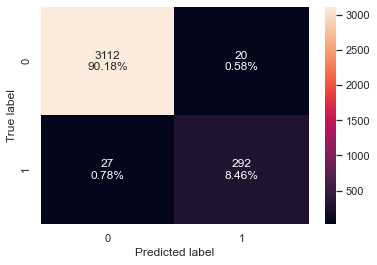

In [ ]:
# look at confusion matrix of the pre pruned model
confucious_matrix(estimator,X_train,y_train)

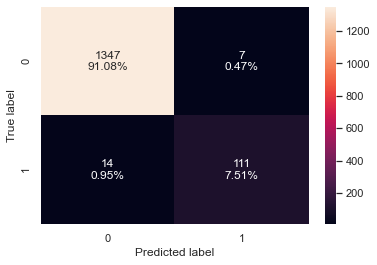

In [ ]:
confucious_matrix(estimator,X_test, y_test)

In [ ]:
model_test_comp_df

,Stock_Dec_Tree_Mod,dec tree (pre-pruning)
Accuracy,0.983773,0.985801
Recall,0.880000,0.888000
Precision,0.924370,0.940678
f1,0.901639,0.913580


### insights on prepruning model
- Acc slightly increased from stock to pre pruning 
- Recall unchanged 
- Precision increased slightly 2% from stock to pre pruning
- F1 increased slightly 1% from stock to prepruning


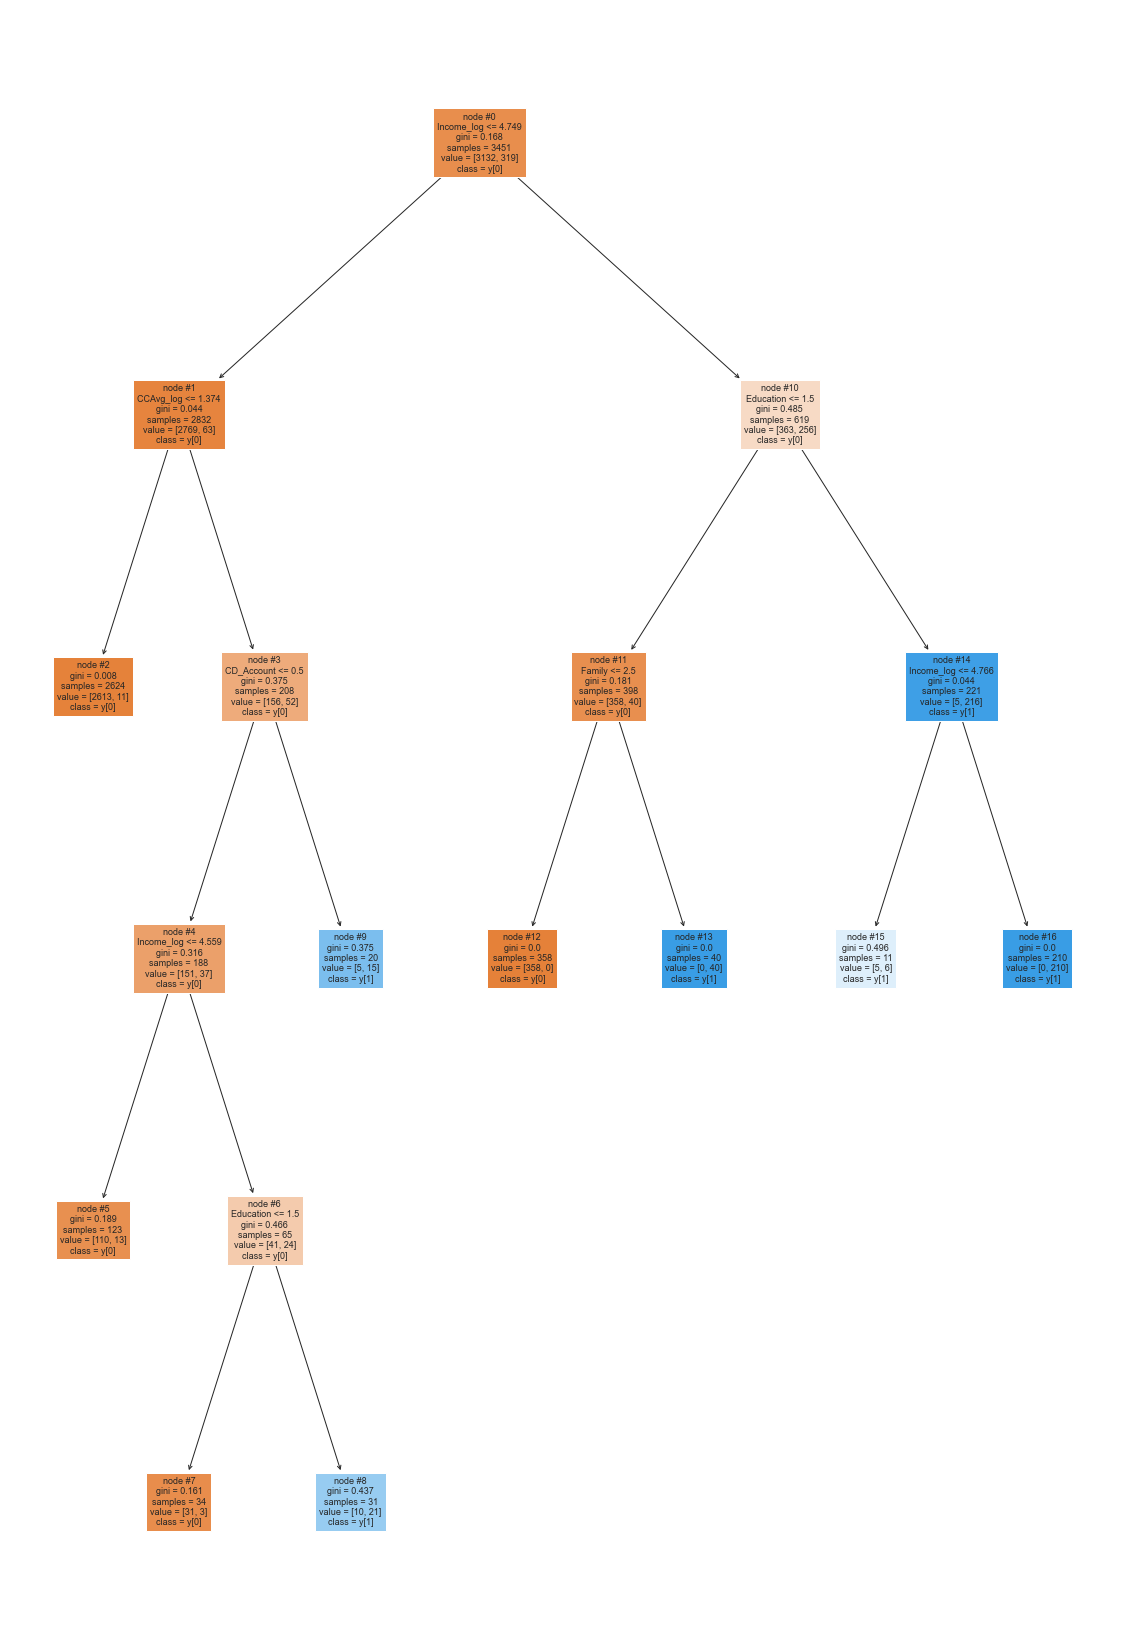

In [ ]:
plt.figure(figsize = (20,30))

out = tree.plot_tree(estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True
                                        )
plt.show()

In [ ]:
# using the f1 score for the model scorer as a hyper parameter
# cuts down on the complexity of the tree drastically

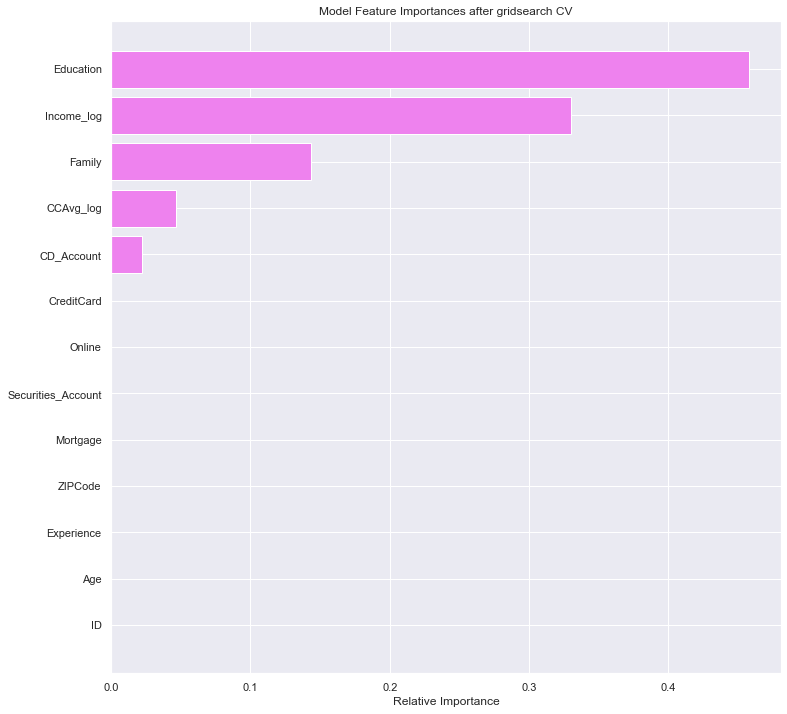

In [ ]:
# look at the feature importances of the tree

# look at the feature importances of the stock model
importances = estimator.feature_importances_
sort_importances = np.argsort(importances)


# plot feature importances

plt.figure(figsize=(12,12))
plt.title("Model Feature Importances after gridsearch CV")
plt.barh(range(len(sort_importances)), importances[sort_importances],color = "violet")
# use list comprehension
plt.yticks(range(len(sort_importances)),[feature_names[i] for i in sort_importances])
plt.xlabel("Relative Importance")
plt.show()


### after pre pruning the model is much simpler now

- Education, Income, Family, and Credit card spending have the most impact on to decide whether a loan is given or not.


### Cost complexity pruning using ccp alpha 

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas,path.impurities

In [ ]:
# turn the path into a dataframe for easier visualization

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000279,0.000559
2,0.000280,0.001679
3,0.000281,0.002242
4,0.000290,0.002532
5,0.000316,0.003796
6,0.000344,0.007235
7,0.000362,0.008322
8,0.000386,0.008708
9,0.000386,0.009095


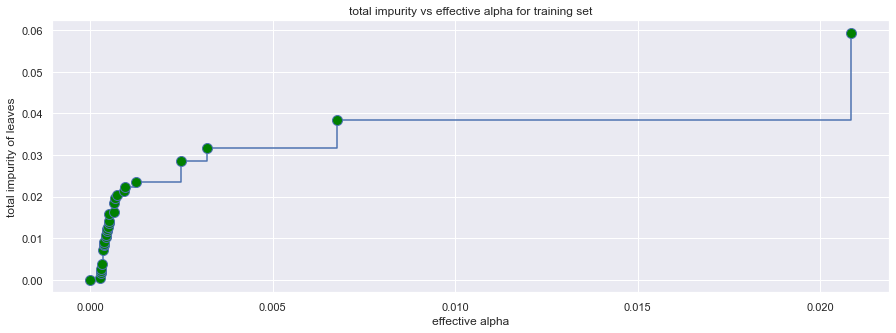

In [ ]:
# plot impurity vs ccp alpha

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = "o",drawstyle= "steps-post",
       markersize = 10, mfc = "green"
       )

ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("total impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []


for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
    
print(
"The number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]

))

The number of nodes in the last tree is: 1 with ccp_alpha: 0.054200901410409306


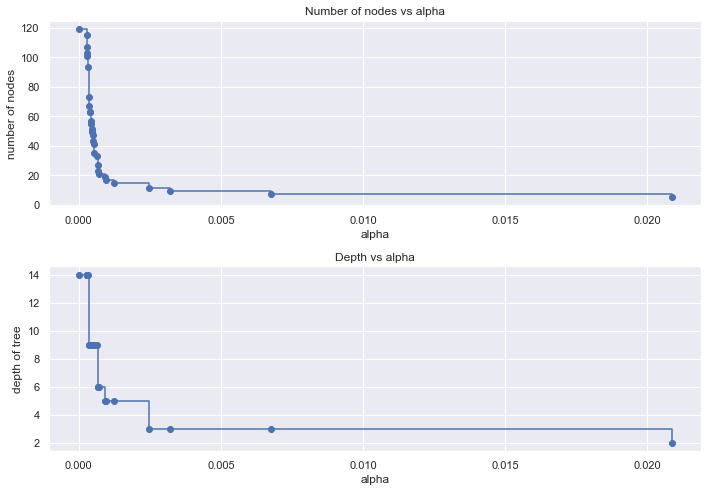

In [ ]:
# use list comprehension to make a list for node counts and depth
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth= [clf.tree_.max_depth for clf in clfs]
fig,ax = plt.subplots(2,1,figsize = (10,7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle = "steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
 
for clf in clfs:
    
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)
    
recall_test = []
 
for clf in clfs:  
    
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)
    
precision_train = []

for clf in clfs:
    
    pred_train = clf.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train.append(values_train)
    
precision_test = []

for clf in clfs:
    
    pred_test = clf.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test.append(values_test)
    
accuracy_train = []

for clf in clfs:
    
    pred_train = clf.predict(X_train)
    values_train = accuracy_score(y_train, pred_train)
    accuracy_train.append(values_train)
    
accuracy_test = []

for clf in clfs:
    
    pred_test = clf.predict(X_test)
    values_train = accuracy_score(y_test, pred_test)
    accuracy_test.append(values_test)

f1_train = []   

for clf in clfs:
    
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)
    

f1_test = []   

for clf in clfs:
    
    pred_test = clf.predict(X_test)
    values_train = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
### make list of each test in above

metrics_list = [recall_train, recall_test,precision_train, precision_test,
               accuracy_train,accuracy_test]

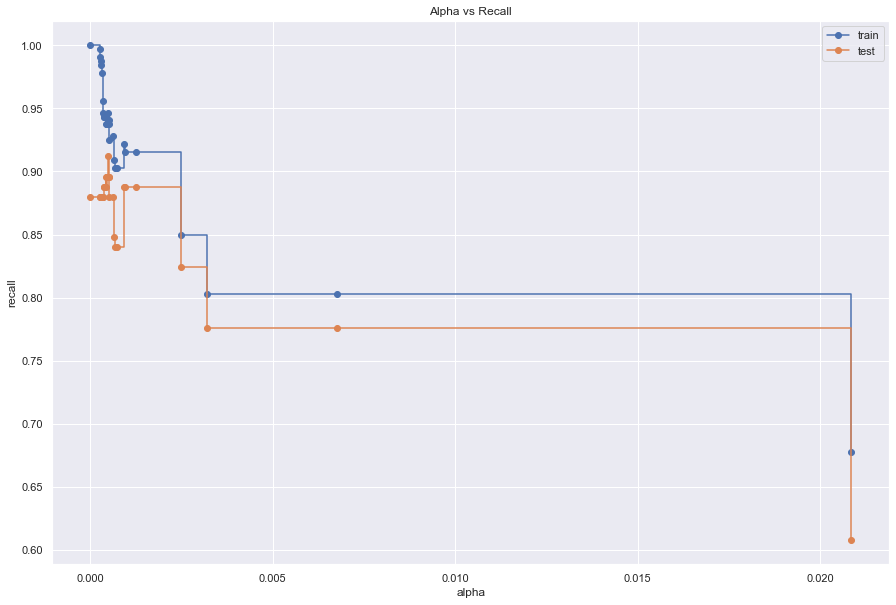

In [ ]:


# plot recall Graphs  

fig , ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("Alpha vs Recall")
ax.plot(ccp_alphas, recall_train, marker="o", drawstyle="steps-post", label = "train")
ax.plot(ccp_alphas, recall_test, marker="o", drawstyle="steps-post", label= "test")
ax.legend()
plt.show()

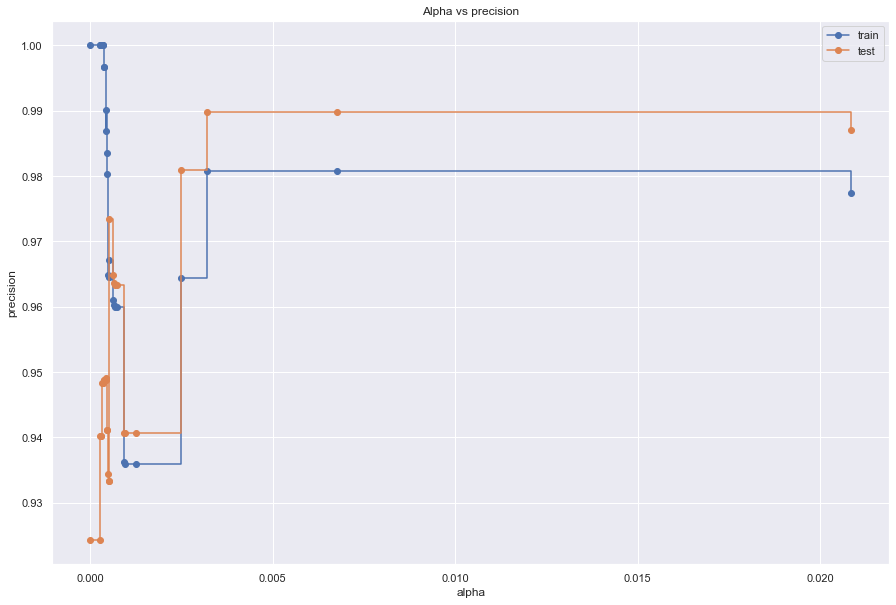

In [ ]:


# plot precison Graphs  

fig , ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("Alpha vs precision")
ax.plot(ccp_alphas, precision_train, marker="o", drawstyle="steps-post", label = "train")
ax.plot(ccp_alphas, precision_test, marker="o", drawstyle="steps-post", label= "test")
ax.legend()
plt.show()

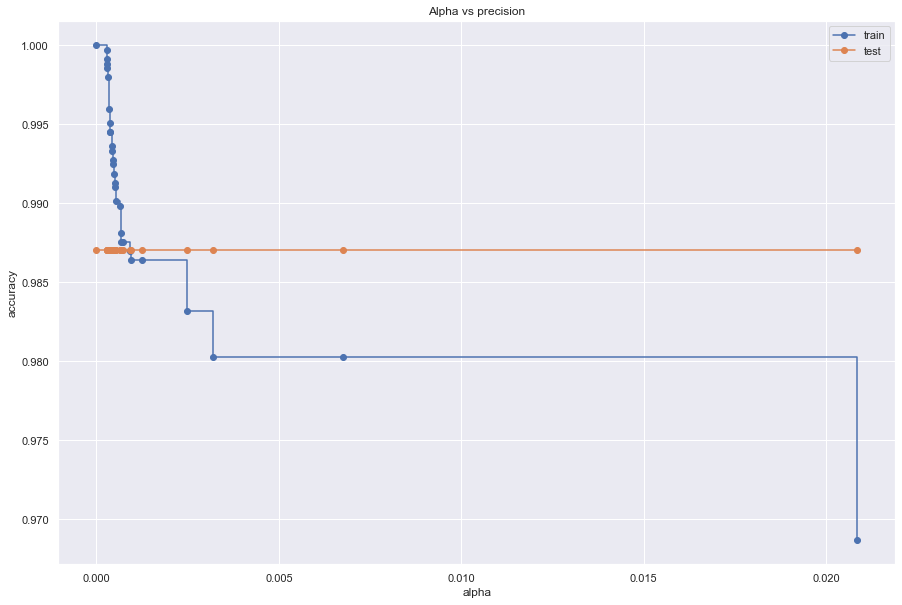

In [ ]:

# plot Accuracy Graphs  

fig , ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Alpha vs precision")
ax.plot(ccp_alphas, accuracy_train, marker="o", drawstyle="steps-post", label = "train")
ax.plot(ccp_alphas, accuracy_test, marker="o", drawstyle="steps-post", label= "test")
ax.legend()
plt.show()


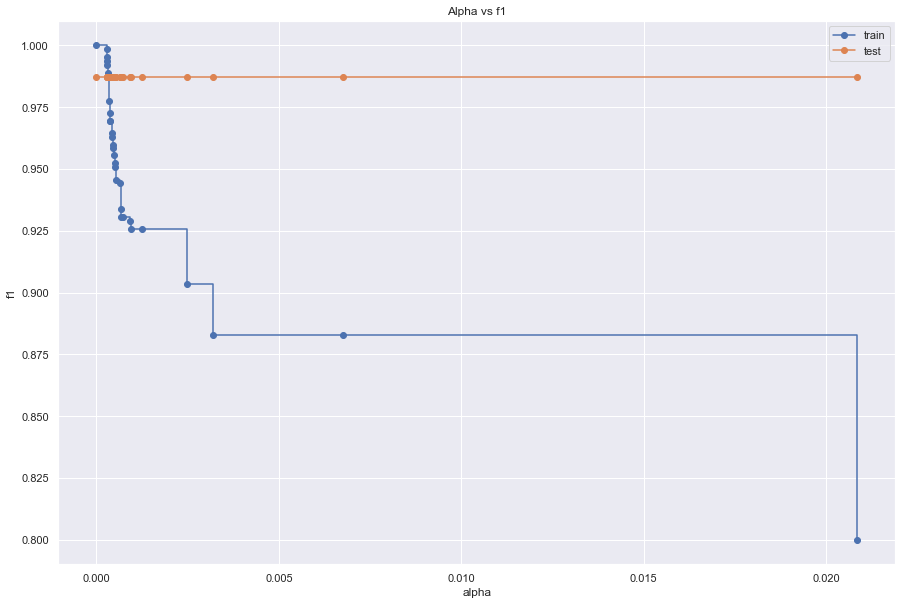

In [ ]:

# plot f1 Graphs  

fig , ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1")
ax.set_title("Alpha vs f1")
ax.plot(ccp_alphas, f1_train, marker="o", drawstyle="steps-post", label = "train")
ax.plot(ccp_alphas, f1_test, marker="o", drawstyle="steps-post", label= "test")
ax.legend()
plt.show()

In [ ]:
# use np.argmax to create the best training model

index_best_model = np.argmax(recall_test)
best_param_model = clfs[index_best_model]
print(best_param_model)

DecisionTreeClassifier(ccp_alpha=0.0004939279787149972, random_state=1)


In [ ]:
### check performance of best _model

model_perf_classification(best_param_model,X_train, y_train)

,Accuracy,Recall,Precision,f1
0,0.991886,0.946708,0.964856,0.955696


In [ ]:
post_pruning_mod = model_perf_classification(best_param_model,X_test,y_test)

In [ ]:
# compare all three models in dataframe and plot them 
model_test_comp_df = pd.concat(
[stock_dec_tree.T, grid_searchcv_mod.T,
 post_pruning_mod.T
    ], axis = 1, 
)

# define column names
model_test_comp_df.columns = [
    "Stock_Dec_Tree_Mod",
    "dec tree (pre-pruning)",
    "Post-Pruning"
]
model_test_comp_df


,Stock_Dec_Tree_Mod,dec tree (pre-pruning),Post-Pruning
Accuracy,0.983773,0.985801,0.987153
Recall,0.880000,0.888000,0.912000
Precision,0.924370,0.940678,0.934426
f1,0.901639,0.913580,0.923077


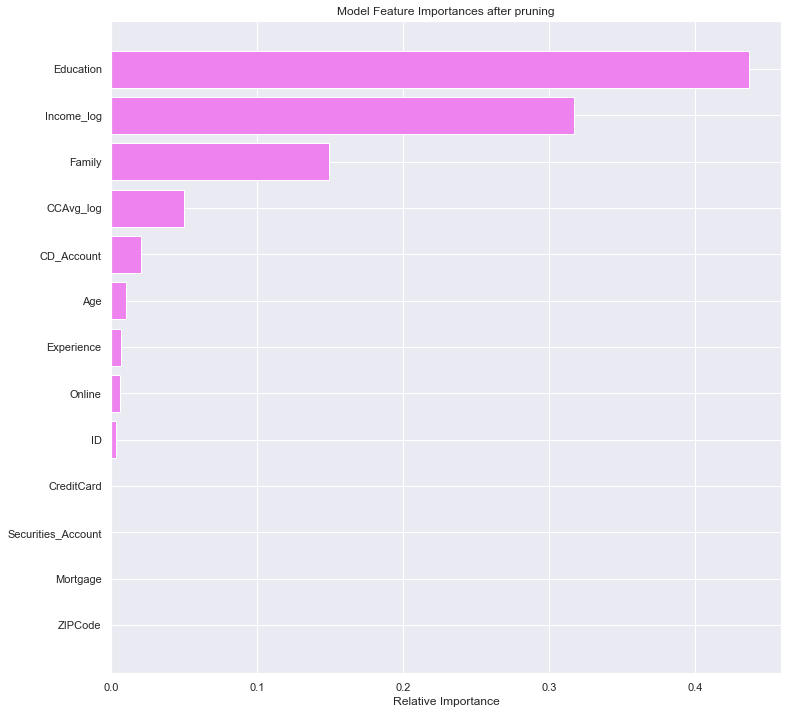

In [ ]:
# look at feature importance after pruning 

# look at the feature importances of the tree

# look at the feature importances of the stock model
importances = best_param_model.feature_importances_
sort_importances = np.argsort(importances)


# plot feature importances

plt.figure(figsize=(12,12))
plt.title("Model Feature Importances after pruning")
plt.barh(range(len(sort_importances)), importances[sort_importances],color = "violet")
# use list comprehension
plt.yticks(range(len(sort_importances)),[feature_names[i] for i in sort_importances])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
# using the ccp_alpha method to prune the decision tree
# the top 3 Feature Importances haven't chnaged, but there 
# are now more features that are affecting the model outcome 
# whether to predict a client getting a loan or not.

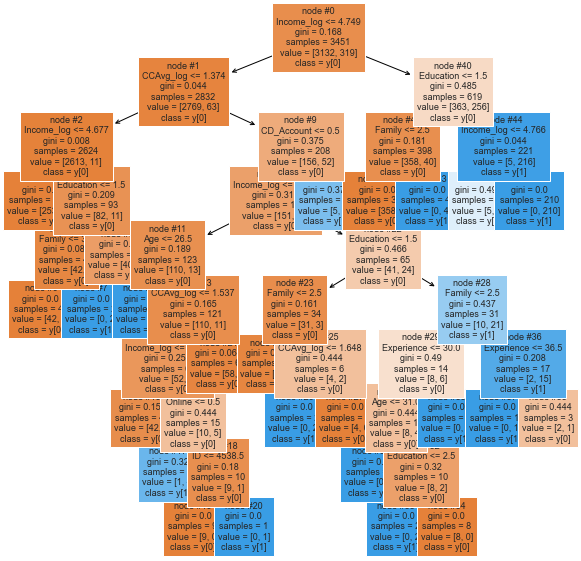

In [ ]:
# look at decision tree map after pruning

plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_param_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

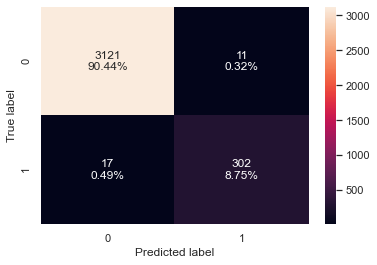

In [ ]:
# look at confusion matrix for improved pruned model 

confucious_matrix(best_param_model, X_train, y_train)

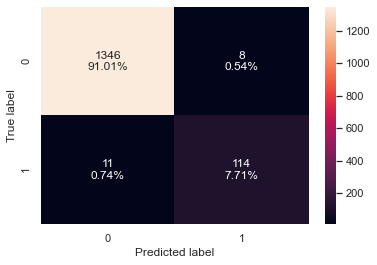

In [ ]:
confucious_matrix(best_param_model, X_test, y_test)

In [ ]:
### make logistic Regression model
from sklearn.linear_model import LogisticRegression


In [ ]:
# instantiate a logisticregression model

Simp_Log_Reg = LogisticRegression()

In [ ]:
# fit the model to the training data
Simp_Log_Reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_perf_classification(Simp_Log_Reg,X_train,y_train)

,Accuracy,Recall,Precision,f1
0,0.947841,0.583072,0.798283,0.673913


In [ ]:
model_perf_classification(Simp_Log_Reg,X_test,y_test)

,Accuracy,Recall,Precision,f1
0,0.939148,0.512,0.688172,0.587156


In [ ]:
# The base logistic regression model doesn't perform well, 
# so we  will do a grid search cv to determine the ideal model

# create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4, 200),
               "solver": ["liblinear","lbfgs"],
               #"solver": ["liblinear","lbfgs","saga"], 
               "max_iter" : [100],
                "random_state" : [1],
                "class_weight" : ["balanced",None]
               }



# set-up random hyperparameter search for Log Reg
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                              
                               verbose=True)
# Fit Random hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.09698580e-04, 1.20337784e-04, 1.32008840e-04,
       1.44811823e-04, 1.58856513e-04, 1.74263339e-04, 1.91164408e-04,
       2.09704640e-04, 2.30043012e-04, 2.52353917e-04, 2.76828663e-04,
       3.03677112e-04, 3.33129479e-04, 3.65438307e-04, 4.00880633e-04,
       4.39760361e-04, 4.82410870e-04, 5.291978...
       2.49450814e+03, 2.73644000e+03, 3.00183581e+03, 3.29297126e+03,
       3.61234270e+03, 3.96268864e+03, 4.34701316e+03, 4.76861170e+03,
       5.23109931e+03, 5.73844165e+03, 6.29498899e+03, 6.90551352e+03,
       7.57525026e+03, 8.30994195e+03, 9.11588830e+03, 1.00000000e+04]),
                         'class_weight': ['balanced', None], 'max_iter': [100],
                         'random_state': [1],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [ ]:
best_gs_model = gs_log_reg.best_estimator_

In [ ]:
best_gs_model

LogisticRegression(C=0.499450511585514, random_state=1, solver='liblinear')

In [ ]:
model_perf_classification(best_gs_model,X_train,y_train)

,Accuracy,Recall,Precision,f1
0,0.953347,0.592476,0.859091,0.701299


In [ ]:
model_perf_classification(best_gs_model,X_test,y_test)

,Accuracy,Recall,Precision,f1
0,0.951318,0.528,0.835443,0.647059


In [ ]:
log_reg_base_perf = model_perf_classification(Simp_Log_Reg,X_test,y_test)
log_reg_gs_perf = model_perf_classification(best_gs_model,X_test,y_test)

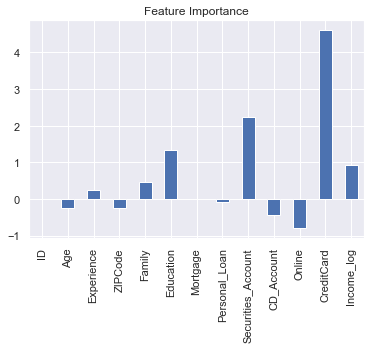

In [ ]:
# look at the coeff for the log reg model(hypertuned)

# match Coef's of feature to columns using zip function
feature_dict = dict(zip(df.columns, list(best_gs_model.coef_[0])))
feature_dict

# visualize feature importance

feature_df = pd.DataFrame(feature_dict, index= [0])
#feature_df.head()
feature_df.T.plot.bar(title="Feature Importance", legend= False,
                     )


plt.show()

In [ ]:
# in the logistic model, the education, securities account and the credit
card make the highest impact towards predicting loan acceptance


In [ ]:
# compare all five models in dataframe and plot them 
model_test_comp_df = pd.concat(
[stock_dec_tree.T, grid_searchcv_mod.T,
 post_pruning_mod.T,log_reg_base_perf.T,
 log_reg_gs_perf.T
    ], axis = 1, 
)

# define column names
model_test_comp_df.columns = [
    "Stock_Dec_Tree_Mod",
    "dec tree (pre-pruning)",
    "Post-Pruning",
    "Log_Reg_Base",
    "Log_Reg_GS"
]
model_test_comp_df

,Stock_Dec_Tree_Mod,dec tree (pre-pruning),Post-Pruning,Log_Reg_Base,Log_Reg_GS
Accuracy,0.983773,0.985801,0.987153,0.939148,0.951318
Recall,0.880000,0.888000,0.912000,0.512000,0.528000
Precision,0.924370,0.940678,0.934426,0.688172,0.835443
f1,0.901639,0.913580,0.923077,0.587156,0.647059


<AxesSubplot:title={'center':'comparison of classification metrics'}>

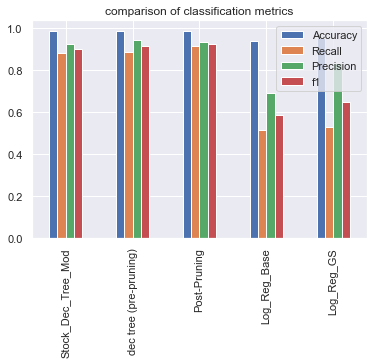

In [ ]:
model_test_comp_df.T.plot.bar(title ="comparison of classification metrics",legend = True)

# Insights & conclusion


- To increase loan acceptance the team should expand it's product portfolio 
into the graduate level and beyond of education level. According to the model
this has a high determination with determining that the client will accept the 
loan or not.
- Income is second to the list that has a high impact to determining if the
client will accept a loan or not.
    - The IQR with Credit Card Spending per month for Non accepting loan clients
    is less than that of the clients that accept the loan
    - The bank should try and target comsumers with lower income to expand their 
    loan portfolio, this seems like an unexplored market segment with this dataset
    Perhaps offer an incentive to accept the loan.
    
- Given the model performance the decision tree pruned model should be used 
by the team. 